<a href="https://colab.research.google.com/github/ShehanPer/ImageClassification/blob/main/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install opendatasets


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import opendatasets as od



In [ ]:
od.download("https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shehansudeepaperera
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification


100%|██████████| 64.4M/64.4M [00:03<00:00, 17.1MB/s]


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

train_dir = "/content/cats-and-dogs-image-classification/train"
test_dir = "/content/cats-and-dogs-image-classification/test"

train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMG_SIZE,
                                                         subset ='training',
                                                         validation_split = 0.1,
                                                         seed=42)
validation_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMG_SIZE,
                                                         subset ='validation',
                                                         validation_split = 0.1,
                                                         seed=42)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMG_SIZE)

Found 557 files belonging to 2 classes.
Using 502 files for training.
Found 557 files belonging to 2 classes.
Using 55 files for validation.
Found 140 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
print(class_names)

['cats', 'dogs']


In [ ]:
#set all the pixel values to 0-1
train_data = train_data.map(lambda x, y: (x/255.0, y))
validation_data = validation_data.map(lambda x, y: (x/255.0, y))
test_data = test_data.map(lambda x, y: (x/255.0, y))

#data augmentations
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.RandomTranslation(0.2, 0.2)
])


In [ ]:
#Model architecture
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu', input_shape=(128, 128, 3))) # Add input shape
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Build the model by specifying the input shape
model.build((None, 128, 128, 3)) # Replace None with batch size if known

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)      

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=validation_data)

Epoch 1/10
16/16 [==============================] - 13s 120ms/step - loss: 0.7677 - accuracy: 0.5319 - val_loss: 0.6890 - val_accuracy: 0.5273
Epoch 2/10
16/16 [==============================] - 2s 80ms/step - loss: 0.6942 - accuracy: 0.5637 - val_loss: 0.6928 - val_accuracy: 0.5091
Epoch 3/10
16/16 [==============================] - 2s 79ms/step - loss: 0.6612 - accuracy: 0.6275 - val_loss: 0.6843 - val_accuracy: 0.5091
Epoch 4/10
16/16 [==============================] - 2s 86ms/step - loss: 0.6681 - accuracy: 0.5956 - val_loss: 0.6873 - val_accuracy: 0.5818
Epoch 5/10
16/16 [==============================] - 2s 105ms/step - loss: 0.6861 - accuracy: 0.5876 - val_loss: 0.6784 - val_accuracy: 0.7091
Epoch 6/10
16/16 [==============================] - 3s 79ms/step - loss: 0.6780 - accuracy: 0.5996 - val_loss: 0.6893 - val_accuracy: 0.5273
Epoch 7/10
16/16 [==============================] - 2s 84ms/step - loss: 0.6847 - accuracy: 0.5837 - val_loss: 0.6752 - val_accuracy: 0.5818
Epoch 8/10

5/5 [==============================] - 1s 71ms/step - loss: 0.6990 - accuracy: 0.5214


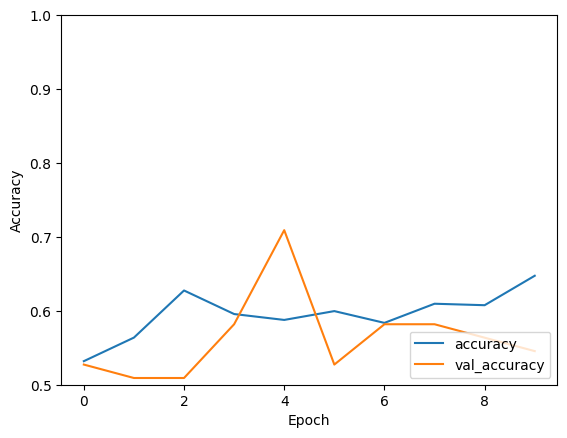

In [19]:
#plot accuracy and loss in two separate graphs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data)




In [20]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [21]:
for batch in test_data.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

print(precision.result().numpy())
print(recall.result().numpy())
print(accuracy.result().numpy())

1/1 [==============================] - 0s 97ms/step
0.6363636
0.1
0.5214286


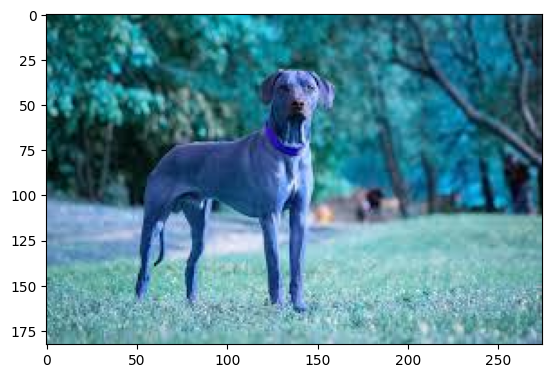

In [48]:
import cv2

image = cv2.imread("/content/cats-and-dogs-image-classification/test/dogs/dog_194.jpg")
plt.imshow(image)
plt.show()


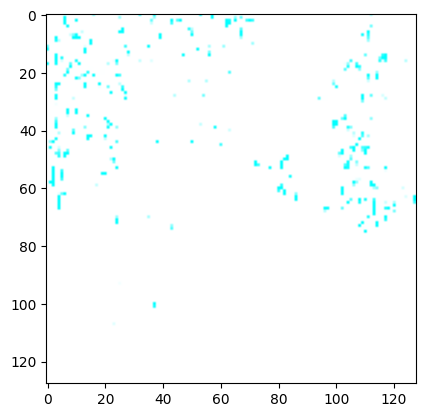

In [49]:
resized_image = tf.image.resize(image, IMG_SIZE)
plt.imshow(resized_image)
plt.show()
scaled_image = resized_image/255

In [50]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.0868182 , 0.2490539 , 0.22896226],
        [0.00466488, 0.15618071, 0.1326513 ],
        [0.02780881, 0.20873006, 0.19696535],
        ...,
        [0.17404887, 0.3785818 , 0.4598039 ],
        [0.18043494, 0.33090958, 0.40008485],
        [0.18739277, 0.2697457 , 0.32856923]],

       [[0.02834311, 0.20201428, 0.1790784 ],
        [0.02370013, 0.20331906, 0.17978965],
        [0.00704896, 0.19035167, 0.1763852 ],
        ...,
        [0.1430913 , 0.3331607 , 0.40704244],
        [0.13979486, 0.28332746, 0.34385136],
        [0.17420343, 0.25908396, 0.31032476]],

       [[0.04256323, 0.23138063, 0.20843333],
        [0.0157947 , 0.2046121 , 0.1816648 ],
        [0.00427701, 0.18971743, 0.17449915],
        ...,
        [0.12787147, 0.29269147, 0.3589905 ],
        [0.11092099, 0.23704457, 0.28960985],
        [0.1484375 , 0.23429704, 0.2784787 ]],

       ...,

       [[0.6196641 , 0.79613465, 0.8118209 ],
        [0.40

In [51]:
np.expand_dims(scaled_image, axis=0).shape

(1, 128, 128, 3)

In [52]:
y_hat = model.predict(np.expand_dims(scaled_image, axis=0))
y_hat

1/1 [==============================] - 0s 21ms/step


array([[0.52567697]], dtype=float32)

Dog


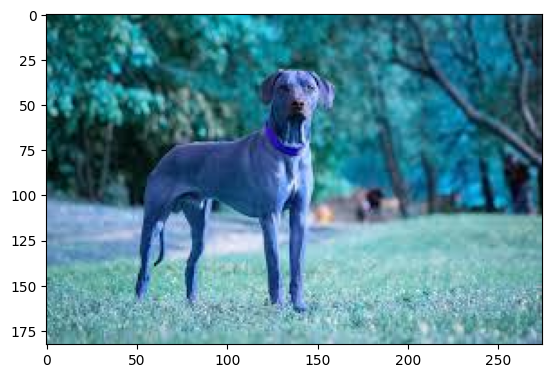

In [53]:
if y_hat > 0.5:
  plt.imshow(image)
  print("Dog")
else:
  plt.imshow(image)
  print("Cat")
